**Averaging Filter, Gaussian Blur, Median Filter, Bilateral Filter, Anisotropic Diffusion, Adaptive Median Filter, Conservative Smoothing, Alpha Trim Mean Filter**


In [ ]:
pip install matplotlib opencv-python

In [2]:
import matplotlib.pyplot as plt
import cv2

def display_image(title, image):
    plt.figure(figsize=(4, 4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

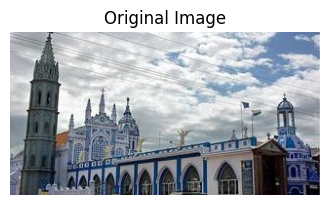

In [3]:
image = cv2.imread('church.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Original Image', rgb_image)

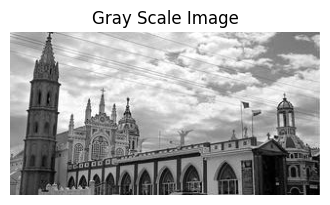

In [4]:
gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image('Gray Scale Image', gray_scale)

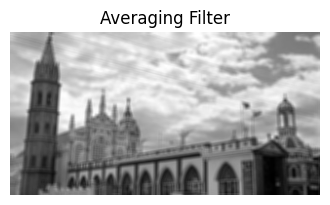

In [10]:
averaging_filter = cv2.blur(gray_scale, (4, 4))
display_image('Averaging Filter', averaging_filter)

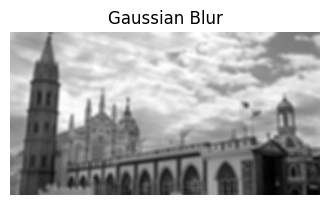

In [20]:
gaussian_blur = cv2.GaussianBlur(gray_scale, (5,5), 2)
display_image('Gaussian Blur', gaussian_blur)

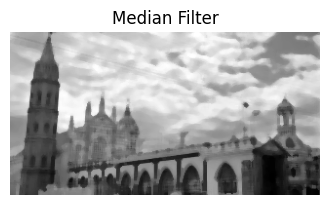

In [22]:
median_filter = cv2.medianBlur(gray_scale, 5)
display_image('Median Filter', median_filter)

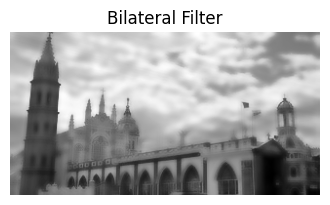

In [30]:
bilateral_filter = cv2.bilateralFilter(gray_scale, 9, 75, 75)
display_image('Bilateral Filter', bilateral_filter)

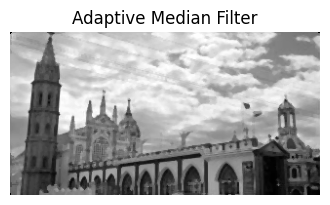

In [43]:
import numpy as np

def adaptive_median_filter(image, S_max):
    padded_image = np.pad(image, S_max // 2, mode='constant', constant_values=0)
    output_image = np.copy(image)
    rows, cols = image.shape

    for i in range(rows):
        for j in range(cols):
            S = 3
            while S <= S_max:
                # Extracting the subimage
                sub_img = padded_image[i:i + S, j:j + S]
                Z_min = np.min(sub_img)
                Z_max = np.max(sub_img)
                Z_m = np.median(sub_img)
                Z_xy = image[i, j]

                if Z_min < Z_m < Z_max:
                    if Z_min < Z_xy < Z_max:
                        output_image[i, j] = Z_xy
                    else:
                        output_image[i, j] = Z_m
                    break
                else:
                    S += 2
            # else:
            output_image[i, j] = Z_m

    return output_image

adaptive_median_filter_image = adaptive_median_filter(gray_scale, 5)
display_image('Adaptive Median Filter', adaptive_median_filter_image)

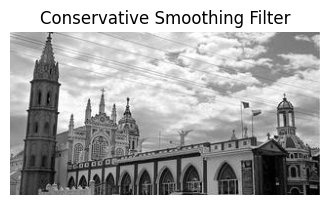

In [38]:
def conservative_smoothing_filter(image, neighborhood_size=3):
    offset = neighborhood_size // 2
    rows, cols = image.shape
    result = np.copy(image)
    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            # Get the neighborhood of the pixel (e.g., 3x3, 5x5)
            neighborhood = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            # Get the minimum and maximum pixel values in the neighborhood
            min_val = np.min(neighborhood)
            max_val = np.max(neighborhood)
            # Get the current pixel value
            current_pixel = image[i, j]
            # Apply the conservative smoothing rule
            if current_pixel < min_val:
                result[i, j] = min_val
            elif current_pixel > max_val:
                result[i, j] = max_val
    return result

conservative_smoothing = conservative_smoothing_filter(gray_scale)
display_image('Conservative Smoothing Filter', conservative_smoothing)


In [46]:
import cv2
import numpy as np

# Anisotropic diffusion function
def anisotropic_diffusion(image, iterations, kappa, gamma, option=1):
    # Convert image to float32 for precision
    image = image.astype(np.float32)

    # Define the convolution kernels for gradients
    kernel_north = np.array([[0, 1, 0],
                             [0, -1, 0],
                             [0, 0, 0]])

    kernel_south = np.array([[0, 0, 0],
                             [0, -1, 0],
                             [0, 1, 0]])

    kernel_east = np.array([[0, 0, 0],
                            [0, -1, 1],
                            [0, 0, 0]])

    kernel_west = np.array([[0, 0, 0],
                            [1, -1, 0],
                            [0, 0, 0]])

    for i in range(iterations):
        # Compute gradients using convolution
        delta_north = cv2.filter2D(image, -1, kernel_north)
        delta_south = cv2.filter2D(image, -1, kernel_south)
        delta_east = cv2.filter2D(image, -1, kernel_east)
        delta_west = cv2.filter2D(image, -1, kernel_west)

        # Calculate conduction coefficient based on the chosen option
        if option == 1:
            # Exponential conduction function (Perona-Malik equation 1)
            c_north = np.exp(-(delta_north / kappa) ** 2)
            c_south = np.exp(-(delta_south / kappa) ** 2)
            c_east = np.exp(-(delta_east / kappa) ** 2)
            c_west = np.exp(-(delta_west / kappa) ** 2)
        elif option == 2:
            # Inverse quadratic conduction function (Perona-Malik equation 2)
            c_north = 1.0 / (1.0 + (delta_north / kappa) ** 2)
            c_south = 1.0 / (1.0 + (delta_south / kappa) ** 2)
            c_east = 1.0 / (1.0 + (delta_east / kappa) ** 2)
            c_west = 1.0 / (1.0 + (delta_west / kappa) ** 2)

        # Update image with the diffusion equation
        image += gamma * (
            c_north * delta_north + c_south * delta_south +
            c_east * delta_east + c_west * delta_west
        )

    return image

# Load a grayscale image
# image = cv2.imread('grayscale_image.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for anisotropic diffusion
iterations = 15    # Number of iterations
kappa = 30         # Conduction coefficient (controls sensitivity to edges)
gamma = 0.2        # Diffusion speed (controls how fast diffusion happens)
option = 1        # 1 for exponential conduction, 2 for inverse quadratic

# Apply anisotropic diffusion
smoothed_image = anisotropic_diffusion(gray_scale, iterations, kappa, gamma, option)

# Convert the result back to uint8 for displaying
smoothed_image = np.clip(smoothed_image, 0, 255).astype(np.uint8)

# Save and display the smoothed image
cv2.imwrite('anisotropic_diffusion_image.jpg', smoothed_image)
cv2.imshow('Original Image', gray_scale)
cv2.imshow('Smoothed Image', smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

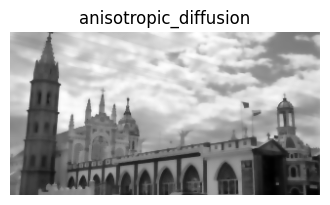

In [40]:
from skimage.restoration import denoise_tv_chambolle
anisotropic = denoise_tv_chambolle(gray_scale)
display_image('anisotropic_diffusion', anisotropic)

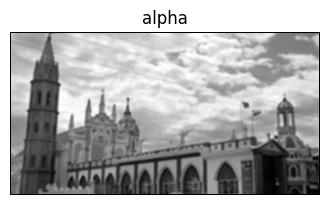

In [42]:
def alpha_trimmed_mean(image, kernel_size=3, no_of_pixels=2):
    offset = kernel_size // 2
    rows, cols = image.shape
    result = np.zeros_like(image)
    for i in range(offset, rows-offset):
        for j in range(offset, cols-offset):
            neighborhood = image[i-offset : i+offset+1, j-offset : j+offset+1].flatten()
            sorted_neighborhood = np.sort(neighborhood)
            trimmed_neighborhood = sorted_neighborhood[no_of_pixels // 2: -no_of_pixels // 2]
            trimmed_mean = np.mean(trimmed_neighborhood)
            result[i, j] = trimmed_mean
    return result

alpha = alpha_trimmed_mean(gray_scale)
display_image('alpha', alpha)